In [63]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

#estimators Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#estimators Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

#model metrics Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
#model metrics Classification
from sklearn.metrics import confusion_matrix, classification_report

#cross validation
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

%matplotlib inline

## Import Data

In [2]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Cleaning and Pre processing

In [4]:
#No Missing Values 
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
#Remove 'ID' attribute
rawData.drop('ID', inplace=True, axis=1)

In [6]:
#Rename column 'default payment next month' to 'DEFAULT'
rawData.rename(columns = {"default payment next month": "DEFAULT"}, inplace = True) 

In [7]:
rawData.dtypes.index

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [8]:
#Discretize LIMIT_BAL and AGE
#bal_bins = (0, 50000 ,100000, 200000, 400000, 600000, 800000, 1000000)
#age_bins = (0, 39, 59, 79)
#rawData['AGE'] = pd.cut(x=rawData['AGE'], bins=age_bins, labels=['20s & 30s', '40s & 50s', '60s & 70s'])
#rawData['LIMIT_BAL'] = pd.cut(x=rawData['LIMIT_BAL'], bins=bal_bins)
#rawData['AGE'].unique()
#rawData['LIMIT_BAL'].unique()

In [9]:
rawData.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [10]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


## Selecting the Features

### Recursive feature elimination with cross-validation

In [88]:
X = rawData.drop('DEFAULT', axis=1)
target = rawData['DEFAULT']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [89]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 16


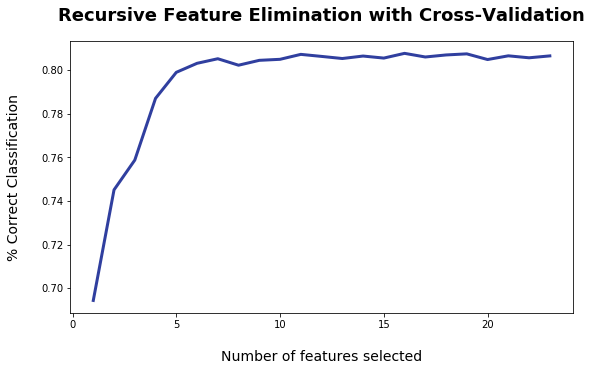

In [91]:
plt.figure(figsize=(9, 5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [92]:
print(np.where(rfecv.support_ == False)[0])

[ 1  2  3  7  8  9 10]


In [93]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,-1,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [94]:
rfecv.estimator_.feature_importances_

array([0.06880505, 0.07773701, 0.1044232 , 0.07228556, 0.06909798,
       0.06145225, 0.06000534, 0.05426589, 0.05427678, 0.05766724,
       0.06086984, 0.05476802, 0.05423635, 0.05007958, 0.04920044,
       0.05082947])

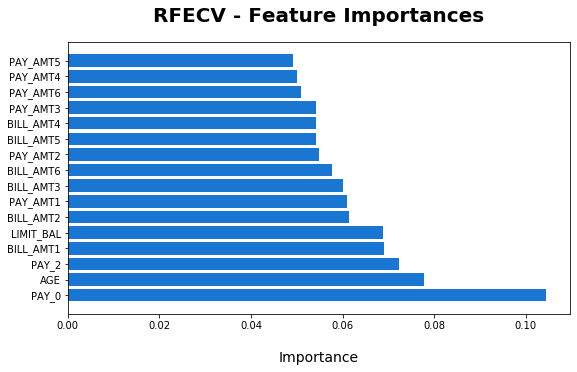

In [97]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(9, 5))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

### Correlation Matrix

In [60]:
correlated_features = set()
correlation_matrix = rawData.drop('DEFAULT', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print ("Correlated Features are:",correlated_features)

Correlated Features are: {'PAY_5', 'BILL_AMT4', 'BILL_AMT2', 'PAY_6', 'BILL_AMT5', 'BILL_AMT6', 'BILL_AMT3'}


In [121]:
#Using all features
#features = rawData.iloc[:,0:23]
features = X
#print('Summary of All features sample')
print('Summary of RFE features sample :')
features.head()

Summary of RFE features sample :


,LIMIT_BAL,AGE,PAY_0,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,-1,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [100]:
#dependent variable (y)
#depVar = rawData['DEFAULT']
#rawData['DEFAULT'].value_counts()
deVar = target

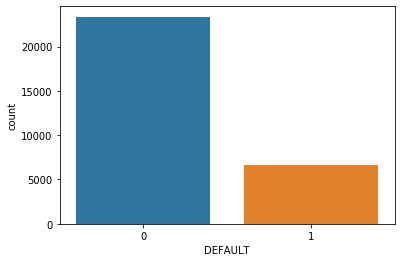

In [101]:
sns.countplot(depVar)

## Training and Testing 

In [102]:
#Training Set (Feature Space: X Training)
X_train = features[: 10000]
X_train_count = len(X_train.index)
print('The number of observations in the Y training set are:',str(X_train_count))
X_train.head()

The number of observations in the Y training set are: 10000


,LIMIT_BAL,AGE,PAY_0,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,-1,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [103]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 10000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 10000


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [16]:
#Testing Set (X Testing)
X_test = features[-1000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
X_test.head()
X_test.info()

The number of observations in the feature testing set is: 1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 29000 to 29999
Data columns (total 23 columns):
LIMIT_BAL    1000 non-null int64
SEX          1000 non-null int64
EDUCATION    1000 non-null int64
MARRIAGE     1000 non-null int64
AGE          1000 non-null int64
PAY_0        1000 non-null int64
PAY_2        1000 non-null int64
PAY_3        1000 non-null int64
PAY_4        1000 non-null int64
PAY_5        1000 non-null int64
PAY_6        1000 non-null int64
BILL_AMT1    1000 non-null int64
BILL_AMT2    1000 non-null int64
BILL_AMT3    1000 non-null int64
BILL_AMT4    1000 non-null int64
BILL_AMT5    1000 non-null int64
BILL_AMT6    1000 non-null int64
PAY_AMT1     1000 non-null int64
PAY_AMT2     1000 non-null int64
PAY_AMT3     1000 non-null int64
PAY_AMT4     1000 non-null int64
PAY_AMT5     1000 non-null int64
PAY_AMT6     1000 non-null int64
dtypes: int64(23)
memory usage: 179.8 KB


In [104]:
#Ground Truth (y_test) 
y_test = depVar[-1000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1000


29000    0
29001    1
29002    1
29003    0
29004    0
Name: DEFAULT, dtype: int64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

## Standardization and Scaling

In [106]:
#Applying standard scaling to get optimised result
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 16), (7000,), (3000, 16), (3000,))

In [108]:
X_train[:10]

array([[-0.81698079,  3.05742561,  1.76448934,  0.1181253 , -0.35031354,
        -0.31478861, -0.26592621, -0.19711942, -0.17104712, -0.22201857,
        -0.24168235, -0.14795029, -0.15353995, -0.24541609, -0.26195233,
        -0.17571436],
       [-0.89372286,  0.05979958,  0.87723804,  2.6087189 , -0.3991773 ,
        -0.39269885, -0.31317151, -0.2823911 , -0.28536322, -0.27223567,
        -0.37295073, -0.07202907, -0.27287448, -0.31346166, -0.33078448,
        -0.21553265],
       [ 2.55967053,  0.3809738 , -1.78451587, -1.54227044, -0.5234249 ,
        -0.50542248, -0.38242883,  0.15811688, -0.27352759, -0.36396938,
         0.50333131,  0.49726626,  2.76615844,  1.36399757,  0.91232415,
        -0.10637744],
       [-0.20304418, -1.01078115, -0.89726457,  0.1181253 , -0.50507662,
        -0.42731126, -0.46937413, -0.56369167, -0.43065983, -0.62621234,
         0.28339115,  0.26965442,  0.07564203,  0.60556172, -0.29726322,
         0.08995327],
       [ 2.78989676,  0.3809738 , -0

## Build and Model

### Random Forest Classifier

In [109]:
Model_RFC = RandomForestClassifier(n_estimators=1000)
Model_RFC.fit(X_train, y_train)
Pred_RFC = Model_RFC.predict(X_test)

In [111]:
Pred_RFC[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [113]:
#See how well our RFC model performed
print('RFC model Performance:')
print(classification_report(y_test, Pred_RFC))
print(confusion_matrix(y_test, Pred_RFC))

RFC model Performance:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2329
           1       0.59      0.30      0.40       671

    accuracy                           0.80      3000
   macro avg       0.71      0.62      0.64      3000
weighted avg       0.77      0.80      0.77      3000

[[2192  137]
 [ 470  201]]


### SVM Classifier

In [114]:
Model_SVM = svm.SVC()
Model_SVM.fit(X_train, y_train)
Pred_SVM = Model_SVM.predict(X_test)

In [115]:
#See how well our SVM model performed
print('SVM model Performance:')
print(classification_report(y_test, Pred_SVM))
print(confusion_matrix(y_test, Pred_SVM))

SVM model Performance:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2329
           1       0.67      0.27      0.38       671

    accuracy                           0.81      3000
   macro avg       0.75      0.61      0.63      3000
weighted avg       0.79      0.81      0.77      3000

[[2242   87]
 [ 493  178]]


### Neural Network Classifier

In [116]:
Model_MLPC = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
Model_MLPC.fit(X_train, y_train)
Pred_MLPC = Model_MLPC.predict(X_test)

In [117]:
#See how well our MLPC model performed
print('MLPC model Performance:')
print(classification_report(y_test, Pred_MLPC))
print(confusion_matrix(y_test, Pred_MLPC))

MLPC model Performance:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2329
           1       0.61      0.30      0.41       671

    accuracy                           0.80      3000
   macro avg       0.72      0.62      0.64      3000
weighted avg       0.78      0.80      0.77      3000

[[2199  130]
 [ 467  204]]


### KNN Classifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier
Model_knn = KNeighborsClassifier(n_neighbors=5)
Model_knn.fit(X_train, y_train)
Pred_knn = Model_knn.predict(X_test)

In [119]:
#See how well our KNN model performed
print('KNN model Performance:')
print(classification_report(y_test, Pred_knn))
print(confusion_matrix(y_test, Pred_knn))

KNN model Performance:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2329
           1       0.51      0.30      0.38       671

    accuracy                           0.78      3000
   macro avg       0.66      0.61      0.62      3000
weighted avg       0.75      0.78      0.76      3000

[[2132  197]
 [ 467  204]]
